In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
WOS_papers = pd.read_excel("./WOS/wos.xls")

In [4]:
WOS_papers.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [5]:
WOS_papers.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Ma, XY; Monfared, R; Grant, R; Goh, YM",NaN,NaN,NaN,"Ma, Xinyue; Monfared, Radmehr; Grant, Rebecca;...",NaN,NaN,Determining Cognitive Workload Using Physiolog...,SENSORS,...,Science Citation Index Expanded (SCI-EXPANDED),Chemistry; Engineering; Instruments & Instrume...,MI0Z6,38544272.0,"Green Published, gold",NaN,NaN,2024-11-13,WOS:001192889700001,0
1,C,"Wolfartsberger, J; Riedl, R",NaN,"Davis, FD; Riedl, R; VomBrocke, J; Leger, PM; ...",NaN,"Wolfartsberger, Josef; Riedl, Rene",NaN,NaN,Smart Production and Manufacturing: A Research...,"INFORMATION SYSTEMS AND NEUROSCIENCE, NEUROIS ...",...,Conference Proceedings Citation Index - Scienc...,Psychology; Behavioral Sciences; Computer Scie...,BV0VF,NaN,NaN,NaN,NaN,2024-11-13,WOS:000980192000022,0
2,C,"Bousdekis, A; Mentzas, G; Apostolou, D; Wellsa...",NaN,"Kim, DY; VonCieminski, G; Romero, D",NaN,"Bousdekis, Alexandros; Mentzas, Gregoris; Apos...",NaN,NaN,Evaluation of AI-Based Digital Assistants in S...,ADVANCES IN PRODUCTION MANAGEMENT SYSTEMS: SMA...,...,Conference Proceedings Citation Index - Scienc...,Science & Technology - Other Topics; Engineering,BU0IN,NaN,NaN,NaN,NaN,2024-11-13,WOS:000869729400058,0
3,J,"Colabianchi, S; Costantino, F; Sabetta, N",NaN,NaN,NaN,"Colabianchi, Silvia; Costantino, Francesco; Sa...",NaN,NaN,Assessment of a large language model based dig...,COMPUTERS IN INDUSTRY,...,Science Citation Index Expanded (SCI-EXPANDED),Computer Science,A9V5T,NaN,hybrid,NaN,NaN,2024-11-13,WOS:001285944800001,0
4,C,"Oliveri, LM; Lo Iacono, N; Chiacchio, F; Facch...",NaN,NaN,NaN,"Oliveri, L. M.; Lo Iacono, N.; Chiacchio, F.; ...",NaN,NaN,A Decision Support System tailored to the Main...,IFAC PAPERSONLINE,...,Conference Proceedings Citation Index - Scienc...,Automation & Control Systems,F6H6V,NaN,gold,NaN,NaN,2024-11-13,WOS:001310813900032,0


                                       keyword  count
0                           cognitive workload     42
1                              mental workload     15
2                                human factors     12
3                                          eeg     12
4                    human-robot collaboration     10
..                                         ...    ...
769                        derivational errors      1
770                              preschool age      1
771                                  copyright      1
772  aerospace medical association paragliding      1
773                   cognitive-workload index      1

[774 rows x 2 columns]


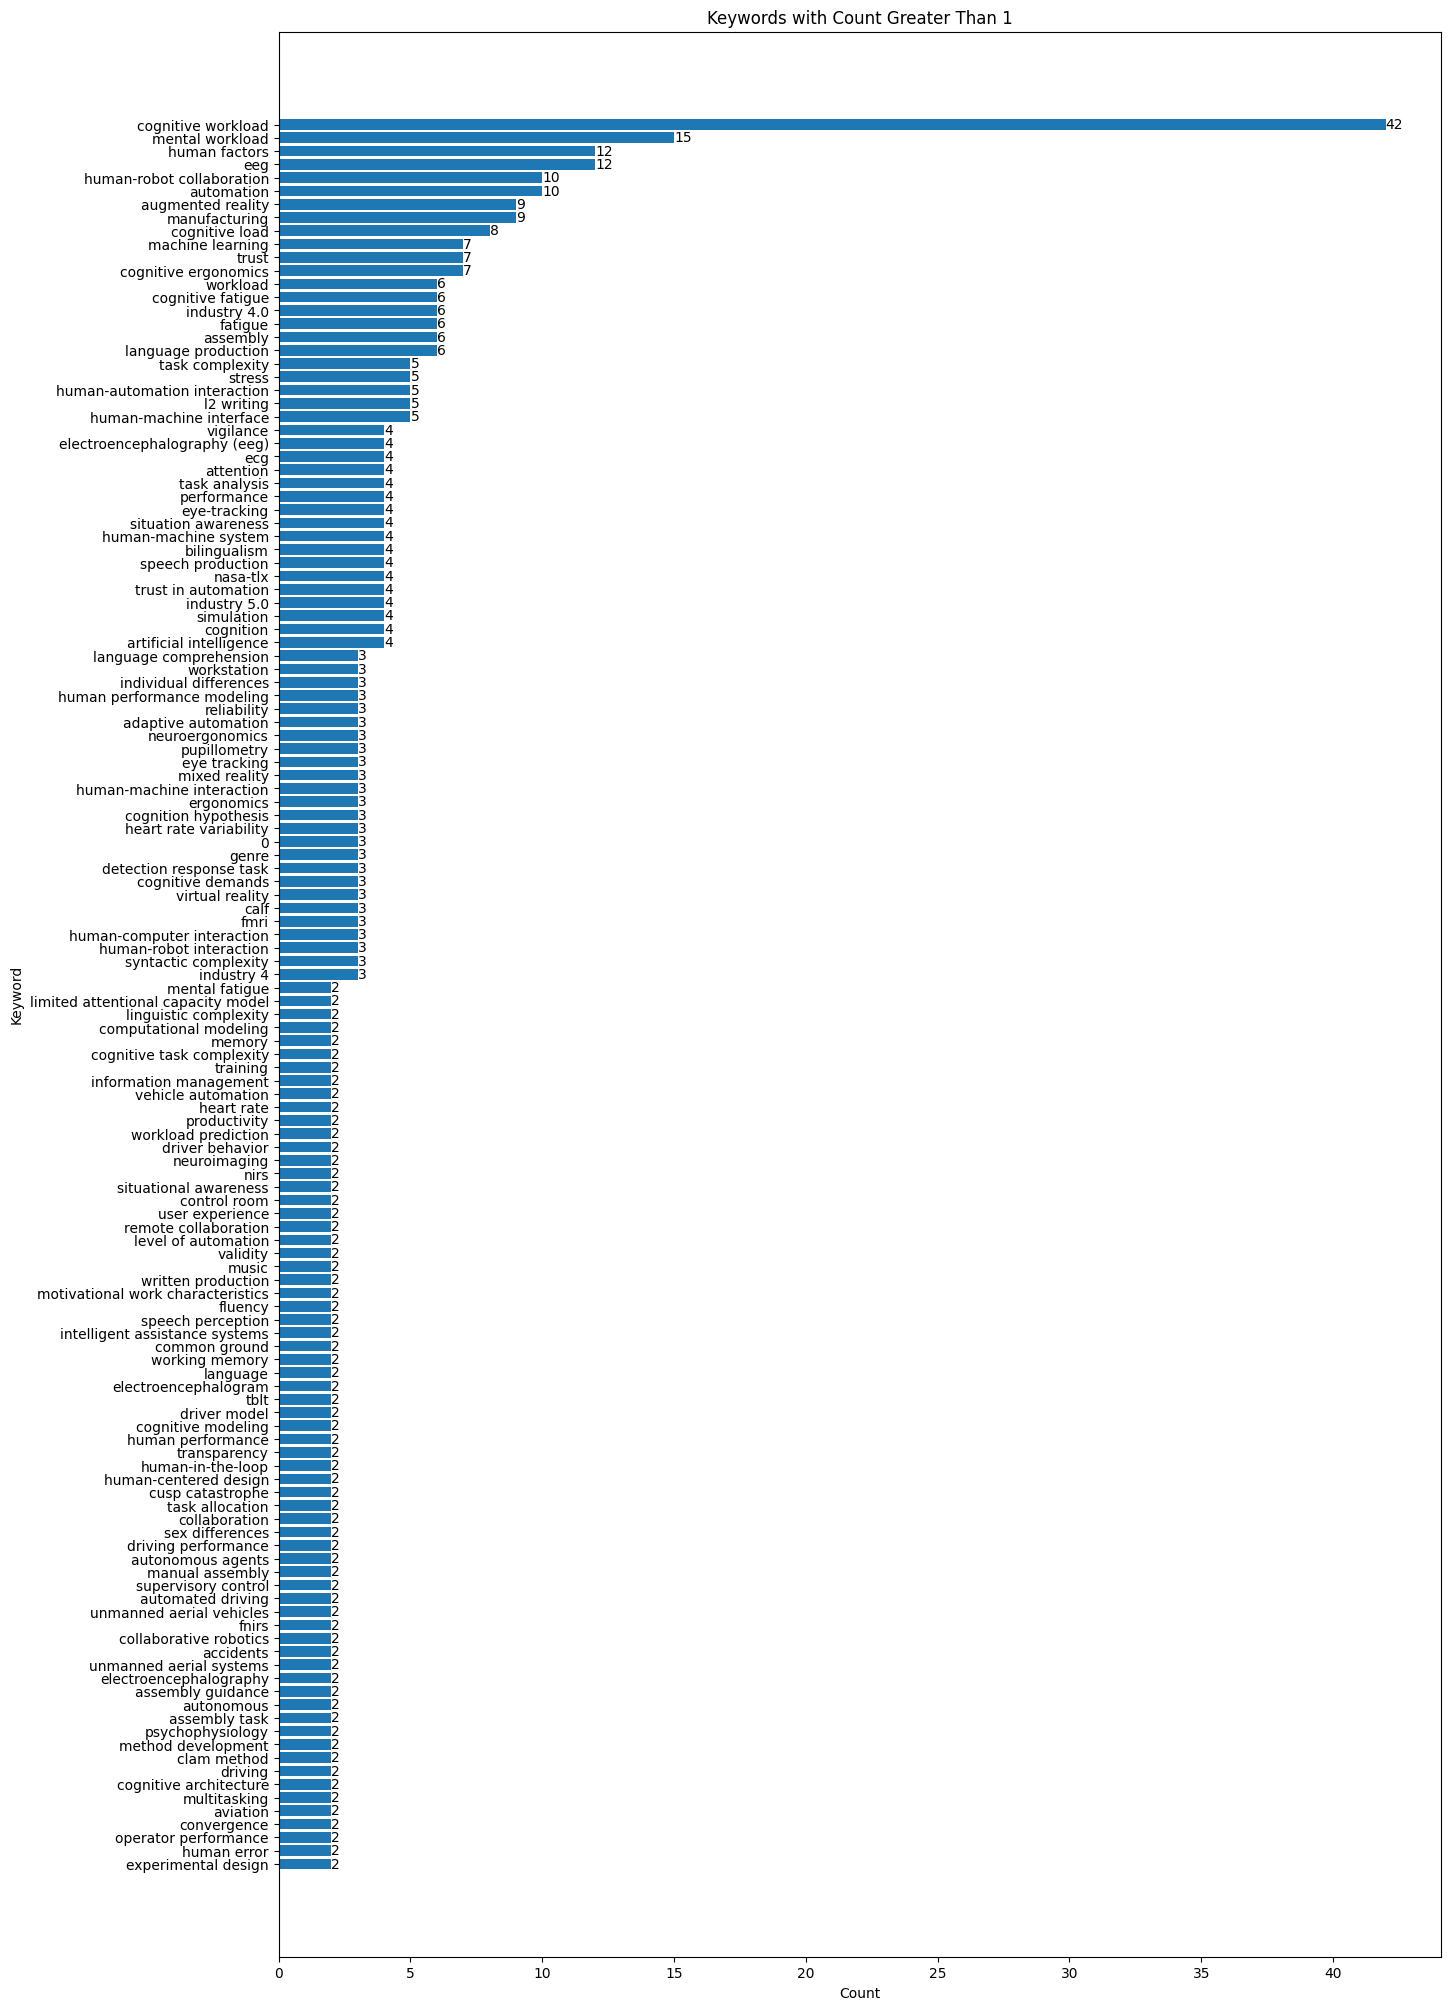

In [6]:
keyword_counts = {}
for i, element in enumerate(WOS_papers[WOS_papers["Author Keywords"].notnull()]["Author Keywords"].unique()):
    split = element.split(";") if type(element) is str else None
    # print(split)
    for kw in split:
        kw = kw.strip().lower()
        if kw not in keyword_counts:
            keyword_counts[kw] = 1
        else:
            keyword_counts[kw] += 1

# Convert the dictionary to a DataFrame
keywords_df = pd.DataFrame(list(keyword_counts.items()), columns=["keyword", "count"])

# Sort the DataFrame by count in descending order (optional)
keywords_df = keywords_df.sort_values(by="count", ascending=False).reset_index(drop=True)

print(keywords_df)

# Filter keywords that have a count greater than 1
keywords_df_filtered = keywords_df[keywords_df["count"] > 1]

# Plotting
plt.figure(figsize=(15, 25))
plt.barh(keywords_df_filtered["keyword"], keywords_df_filtered["count"], align="center")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.title("Keywords with Count Greater Than 1")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top

# Adding count labels at the end of each bar
for index, value in enumerate(keywords_df_filtered["count"]):
    plt.text(value, index, str(value), va="center")

plt.show()

In [7]:
WOS_papers["Cited Reference Count"].sort_values(ascending=False).head(20)

209    140
53     136
150    109
166    100
187     98
223     97
169     94
222     93
203     93
92      92
98      91
38      90
149     90
31      88
220     88
202     88
66      87
26      87
131     87
208     87
Name: Cited Reference Count, dtype: int64

In [8]:
WOS_papers["Keywords Plus"]

0                                                 STRESS
1               VIRTUAL-REALITY; TECHNOSTRESS; BREAKDOWN
2              MENTAL WORKLOAD; COGNITIVE LOAD; NASA-TLX
3                          INDUSTRY 4.0; TRAINING SYSTEM
4                                                    NaN
                             ...                        
221                           ISOMETRIC FORCE PRODUCTION
222    AGE-RELATED DIFFERENCES; WORKING-MEMORY; FUNCT...
223    PHYSICAL PERFORMANCE; CARDIOVASCULAR-RESPONSE;...
224    HEART-RATE-VARIABILITY; FRONTAL EEG ASYMMETRY;...
225                                    DRIVER; ATTENTION
Name: Keywords Plus, Length: 226, dtype: object

In [9]:
WOS_papers.to_csv("./WOS/WOS.csv")